<a href="https://colab.research.google.com/github/waghmarerupvant4/My_Practice/blob/main/Practice_House_Price_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [33]:
df=pd.read_csv('https://raw.githubusercontent.com/waghmarerupvant4/my_projects/main/House%20Price%20Prediction%20Dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [35]:
df_corr=df.corr()

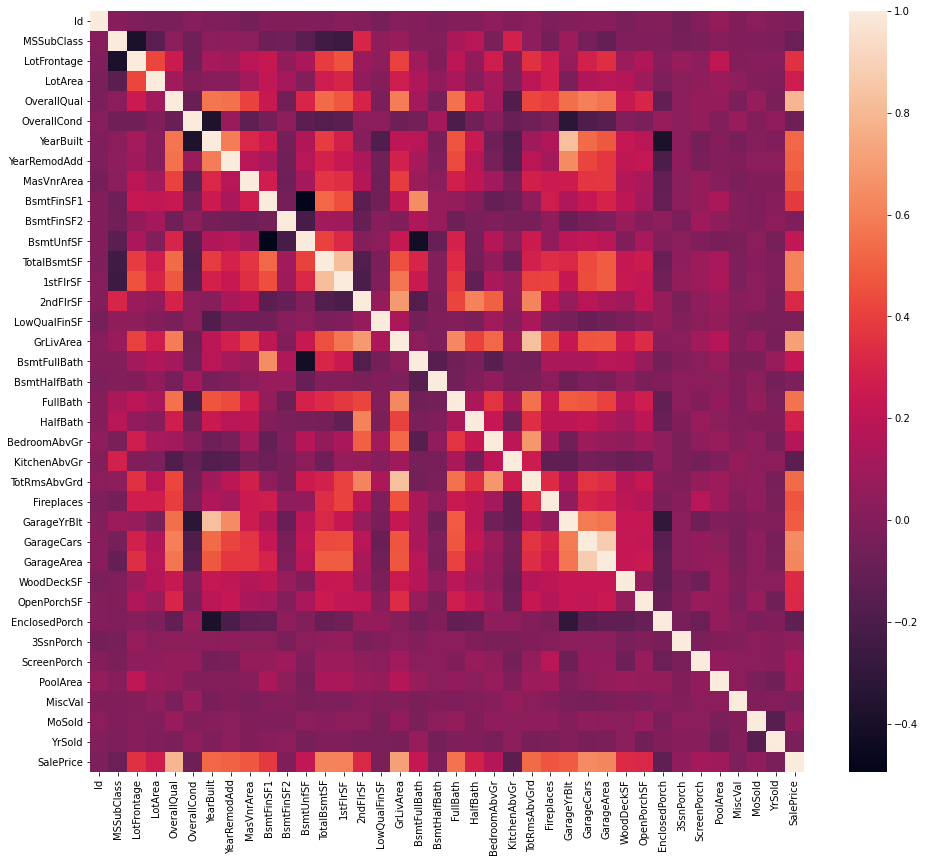

In [36]:
plt.figure(figsize=(16,14))
sns.heatmap(df_corr)

In [37]:
cols=df_corr.nlargest(14,'SalePrice')['SalePrice'].index

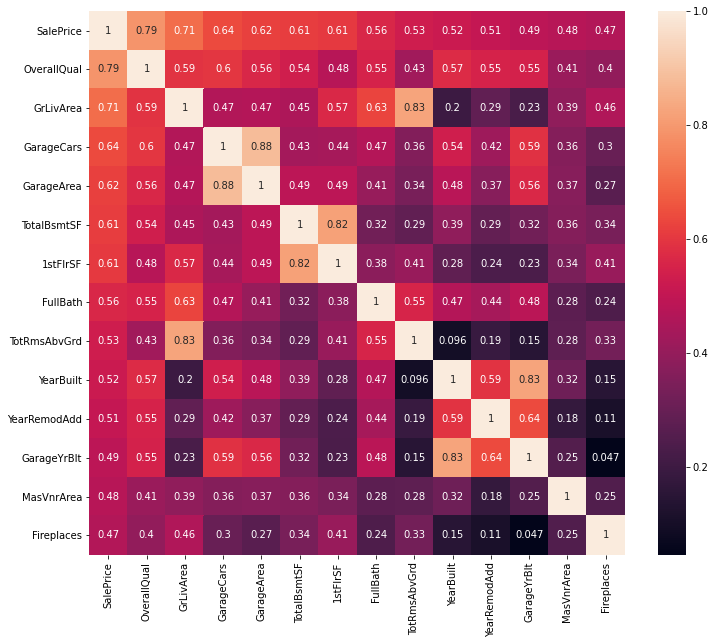

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(df[cols].corr(),annot=True)

In [39]:
df=df[cols].drop(['1stFlrSF','GarageCars','GarageYrBlt'],axis=1)
df.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces
0,208500,7,1710,548,856,2,8,2003,2003,196.0,0
1,181500,6,1262,460,1262,2,6,1976,1976,0.0,1
2,223500,7,1786,608,920,2,6,2001,2002,162.0,1
3,140000,7,1717,642,756,1,7,1915,1970,0.0,1
4,250000,8,2198,836,1145,2,9,2000,2000,350.0,1


In [40]:
df.isnull().mean()

SalePrice       0.000000
OverallQual     0.000000
GrLivArea       0.000000
GarageArea      0.000000
TotalBsmtSF     0.000000
FullBath        0.000000
TotRmsAbvGrd    0.000000
YearBuilt       0.000000
YearRemodAdd    0.000000
MasVnrArea      0.005479
Fireplaces      0.000000
dtype: float64

In [41]:
from sklearn.impute import KNNImputer
knn=KNNImputer()

In [42]:
copy=df.copy()
copy=knn.fit_transform(copy)
df=pd.DataFrame(copy,columns=df.columns)
df.head()

,SalePrice,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces
0,208500.0,7.0,1710.0,548.0,856.0,2.0,8.0,2003.0,2003.0,196.0,0.0
1,181500.0,6.0,1262.0,460.0,1262.0,2.0,6.0,1976.0,1976.0,0.0,1.0
2,223500.0,7.0,1786.0,608.0,920.0,2.0,6.0,2001.0,2002.0,162.0,1.0
3,140000.0,7.0,1717.0,642.0,756.0,1.0,7.0,1915.0,1970.0,0.0,1.0
4,250000.0,8.0,2198.0,836.0,1145.0,2.0,9.0,2000.0,2000.0,350.0,1.0


In [43]:
df.isnull().mean().mean()

0.0

In [44]:
X=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=99)

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report, accuracy_score

In [48]:
#Building and Training the Model and Displaying the Score of the Model
model=RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))

0.9728258718900188


In [49]:
#Making predictions on test set 
Y_predict=model.predict(X_test)
#Creating Dataframe to store the Ids with Prediction
output=pd.DataFrame({'Actual':y_test,'Predicted':Y_predict})
print(output)

        Actual  Predicted
57    196500.0  196808.50
887   135500.0  131910.00
1174  239000.0  187944.80
1164  194000.0  164290.80
820   183000.0  200350.00
...        ...        ...
356   173000.0  160400.30
88     85000.0  132684.04
53    385000.0  350370.34
25    256300.0  297233.78
254   145000.0  112404.00

[292 rows x 2 columns]


In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

In [51]:
yt_test = sm.add_constant(y_test)
model_RFXT = sm.OLS(Y_predict, yt_test).fit()

#display adjusted R-squared
adj_R2=model_RFXT.rsquared_adj
print('Adjusted R_sq : %f' %adj_R2)

Adjusted R_sq : 0.874060


In [52]:
linearModel=LinearRegression()
linearModel.fit(X_train, y_train)
print(linearModel.score(X_train,y_train))

0.7707410709199225


In [53]:
#making prediction using Linear Model
Linear_predict=linearModel.predict(X_test)

In [54]:
#Creating Dataframe to store the Ids with Prediction
linear_output=pd.DataFrame({'Actual':y_test,'Predicted':Linear_predict})
print(linear_output)

        Actual      Predicted
57    196500.0  209623.594417
887   135500.0  121312.906626
1174  239000.0  186732.673268
1164  194000.0  167795.104111
820   183000.0  203314.381790
...        ...            ...
356   173000.0  165389.664786
88     85000.0   79282.955292
53    385000.0  285424.439066
25    256300.0  291408.359963
254   145000.0  124490.328926

[292 rows x 2 columns]


In [55]:

model_LR = sm.OLS(Linear_predict, yt_test).fit()

#display adjusted R-squared
adjLR_R2=model_LR.rsquared_adj
print('Adjusted R_sq : %f' %adjLR_R2)

Adjusted R_sq : 0.831641


In [56]:
# Lasso regressor

#Building the Model in Lasso Regression Model
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)
print(lasso_model.score(X_train,y_train))

#Testing the Model
lasso_predict=lasso_model.predict(X_test)

#Creating dataframe to store ID with prediction
lasso_output=pd.DataFrame({'Actual':y_test,'Predicted':lasso_predict})
print(lasso_output)

0.7707410689293991
        Actual      Predicted
57    196500.0  209625.278464
887   135500.0  121309.043819
1174  239000.0  186734.169504
1164  194000.0  167794.048650
820   183000.0  203317.623299
...        ...            ...
356   173000.0  165393.937270
88     85000.0   79286.231424
53    385000.0  285412.562453
25    256300.0  291408.175429
254   145000.0  124492.149325

[292 rows x 2 columns]


In [57]:
model_LSR = sm.OLS(lasso_predict, yt_test).fit()

#display adjusted R-squared
adjLSR_R2=model_LSR.rsquared_adj
print('Adjusted R_sq : %f' %adjLSR_R2)

Adjusted R_sq : 0.831640
